<div class="frontmatter text-center">
<h2> MATH5027 Scientific Python, Fall 2017</h2>
<h2> Homework 3, Due: Tuesday October 10th, 3pm </h2>
</div>

Instructions: complete the selection of exercises from the week's class notebooks. Use markdown cells between code examples to explain.

## Questions 
### From Class 4:

1) Write a Python program to concatenate following dictionaries to create a new one.

Sample Dictionary: 

``dic1={1:10, 2:20} 
dic2={3:30, 4:40} 
dic3={5:50,6:60} ``

_Hint_: Have a look at the documentation for dict.update().

2) Write a Python program to map two lists into a dictionary. For example:
```keys = ['red', 'green', 'blue']  
values = ['#FF0000','#008000', '#0000FF']  ```

should become:
```{'blue': '#0000FF', 'green': '#008000', 'red': '#FF0000'}```

Try to use a dictionary comprehension.

3) Write a Python program to multiply all the values in a dictionary, assuming you have a dictionary with floats or ints as your values.

4) Write a ***function*** to print keys and values of a dictionary:
* sorted by key
* sorted by value

_Hint_: there are many ways to do this, but give it a try with lambda functions.

<h2>Answers from Class 4</h2>

1) concat the dicts

In [1]:
dic1={1:10, 2:20} 
dic2={3:30, 4:40} 
dic3={5:50,6:60}

def DoomsDayDevice(x, y, z):
    x.update(y)
    x.update(z)
    return x

DoomsDayDevice(dic1, dic2, dic3)

{1: 10, 2: 20, 3: 30, 4: 40, 5: 50, 6: 60}

2) map the lists into a dict

In [2]:
keys = ['red', 'green', 'blue']
values = ['#FF0000','#008000', '#0000FF']
# {'blue': '#0000FF', 'green': '#008000', 'red': '#FF0000'}


finalDict = {}
for key, value in zip(keys, values):
    finalDict[key] = value

finalDict

{'blue': '#0000FF', 'green': '#008000', 'red': '#FF0000'}

In [5]:
# trying the same question with dict comprehension
keys = ['red', 'green', 'blue']
values = ['#FF0000','#008000', '#0000FF']
# {'blue': '#0000FF', 'green': '#008000', 'red': '#FF0000'}


finalDict = {key : value for key,value in zip(keys, values)}

finalDict

{'blue': '#0000FF', 'green': '#008000', 'red': '#FF0000'}


### From Class 5:

1) Create the list flips with a one-liner (hint: use list comprehension and google how to use if/else statements within the comprehension).

2) What type of variable is run2count? Can you do casting (i.e. can you change the type to something more familiar)?

3) Write code to create a dictionary like run2count, without using Counter

4) Take the logarithms of the number of runs and plot that vs run length
_Note_: writing ```log(count)``` will return an error. The goal of the exercise is to find the solution to this :)

5) Use ```semilogy``` to put the y-axis in a log scale

6) Figure out how to plot the x-axis in log scale, then both axes.


<h2>Answers from Class 4</h2>

1) flips with list comprehension

In [2]:
import random
p = 0.7

flips = ["H" if random.random() < p else "T" for i in range(1000)]
flips[:10] # lets check the first elements of the list

['H', 'H', 'T', 'H', 'T', 'T', 'H', 'H', 'H', 'T']

2) variable is run2count

In [3]:
from collections import Counter

S = "".join( flips )
heads_runs = S.split("T")
run_lengths = [ len(run) for run in heads_runs if run ]

run2count = Counter(run_lengths)
print(run2count)

Counter({1: 64, 2: 50, 4: 24, 3: 21, 5: 11, 6: 9, 7: 8, 8: 8, 11: 4, 9: 2, 10: 2, 14: 2, 13: 1, 17: 1, 12: 1})


In [4]:
type(run2count)

collections.Counter

from official documentation:
Collections module implements specialized container datatypes providing alternatives to Python’s general purpose built-in containers, dict, list, set, and tuple.

Counter method creates dict subclass for counting a hashable object. In this case our object is run_lenghts and we got ourselves a Counter.

Let's see if we can cast it to a different type which is more familiar

In [5]:
list(run2count) #keys are returned however the values are not coming. Might be useful if I was only interested in keys.

[2, 1, 3, 6, 13, 5, 7, 8, 4, 11, 9, 17, 10, 14, 12]

In [6]:
dict(run2count) #both keys and values are returned. This is a good one.

{1: 64,
 2: 50,
 3: 21,
 4: 24,
 5: 11,
 6: 9,
 7: 8,
 8: 8,
 9: 2,
 10: 2,
 11: 4,
 12: 1,
 13: 1,
 14: 2,
 17: 1}

In [7]:
tuple(run2count) #again keys are returned but values are not

(2, 1, 3, 6, 13, 5, 7, 8, 4, 11, 9, 17, 10, 14, 12)

In [8]:
int(run2count) #this operation doesnt make sense however I would like to show what happens:

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Counter'

3) Write code to <b>create a dictionary</b> like run2count, without using Counter

In [14]:
S = "".join( flips )
heads_runs = S.split("T")
run_lengths = [ len(run) for run in heads_runs if run ]

print(run_lengths)
print("***********************************************************************************")

d = {}
for i in run_lengths:
    
    if i in d:
        d[i] = d[i] + 1
    else:
        d[i] = 1

print(d)


[2, 1, 3, 1, 6, 1, 2, 13, 5, 7, 3, 1, 8, 1, 4, 1, 2, 3, 5, 2, 1, 8, 8, 1, 2, 1, 2, 2, 2, 1, 4, 1, 1, 2, 1, 1, 1, 4, 2, 2, 4, 1, 4, 2, 11, 1, 9, 3, 1, 2, 3, 1, 3, 1, 3, 4, 9, 7, 1, 2, 4, 3, 7, 2, 4, 1, 2, 1, 2, 3, 8, 2, 1, 6, 17, 2, 4, 7, 1, 1, 1, 3, 6, 4, 2, 11, 1, 2, 5, 10, 3, 1, 5, 1, 5, 1, 1, 6, 2, 1, 1, 2, 2, 4, 5, 2, 4, 3, 1, 3, 2, 1, 3, 3, 2, 6, 3, 5, 7, 7, 6, 4, 2, 4, 2, 2, 1, 2, 4, 4, 1, 3, 1, 8, 1, 6, 1, 2, 1, 1, 1, 1, 2, 5, 4, 7, 2, 1, 2, 8, 4, 4, 2, 7, 2, 1, 3, 2, 1, 1, 2, 2, 1, 14, 1, 1, 4, 1, 14, 1, 8, 4, 2, 1, 2, 8, 2, 1, 3, 1, 1, 1, 1, 3, 11, 11, 5, 10, 6, 3, 2, 4, 2, 4, 1, 1, 1, 2, 6, 1, 2, 4, 12, 2, 5, 5, 2, 2]
***********************************************************************************
{2: 50, 1: 64, 3: 21, 6: 9, 13: 1, 5: 11, 7: 8, 8: 8, 4: 24, 11: 4, 9: 2, 17: 1, 10: 2, 14: 2, 12: 1}


4) Take the logarithms of the number of runs and plot that vs run length Note: writing log(count) will return an error. The goal of the exercise is to find the solution to this :)

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import math
%matplotlib inline

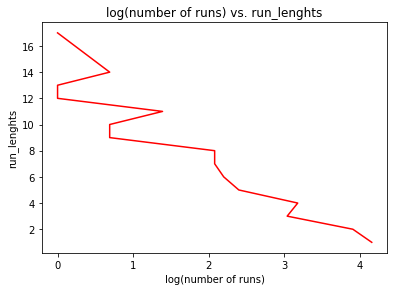

In [41]:
#run lenghts are 2,1,3,6,13... y axis
#number of runs are 50, 64, 21, 9, 1... take the log of these.. x axis

# split run and count into separate lists:
run_count_sorted=sorted(d.items(), key=lambda x: x[0])
run,count = zip(*run_count_sorted) 
#print(run, count)

log_count = [round(math.log(i), 2) for i in count]


'''
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(log_count, run, 'r')

axes.set_xlabel('log(number of runs)')
axes.set_ylabel('run_lenghts')
axes.set_title('log(number of runs) vs. run_lenghts')

'''
